<a href="https://colab.research.google.com/github/Itsuki-Hamano123/auto_ml/blob/master/auto-keras/california_housing/fetch_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install 'scikit-learn>0.23'
%pip show scikit-learn pandas

     |████████████████████████████████| 6.8MB 8.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
Name: scikit-learn
Version: 0.23.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: joblib, numpy, threadpoolctl, scipy
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute
---
Name: pandas
Version: 1.0.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: python-dateutil, numpy, pytz
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3,

In [3]:
%cd /content/drive/My Drive/機械学習練習/AutoML/auto-keras/california_housing
%ls

/content/drive/My Drive/機械学習練習/AutoML/auto-keras/california_housing
fetch_data.ipynb


In [27]:
import cloudpickle, os

import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## データ読み込み

In [18]:
res = fetch_california_housing(as_frame=True)

FEATURE_COLS  = res.feature_names
TARGET_COL = res.target_names
print('features cols : {}'.format(FEATURE_COLS))
print('target col : {}'.format(TARGET_COL))

df = pd.concat([res.data, res.target], axis=1)
df

features cols : ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target col : ['MedHouseVal']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## データ分割
学習/検証/テストに3分割

In [16]:
SEED = 7
train_df, test_df = train_test_split(df, test_size=0.2, random_state=SEED)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=SEED)

print('train shape:{}'.format(train_df.shape))
print('validation shape:{}'.format(val_df.shape))
print('test shape:{}'.format(test_df.shape))

train shape:(13209, 9)
validation shape:(3303, 9)
test shape:(4128, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000
mean,3.841704,28.626088,5.429359,1.100950,1436.912787,3.056979,35.621619,-119.556919,2.049578
std,1.900738,12.618110,2.683741,0.527306,1174.790370,7.174546,2.133565,2.004591,1.145536
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.543700,18.000000,4.414080,1.006623,792.000000,2.433809,33.940000,-121.790000,1.186000
50%,3.500000,29.000000,5.216649,1.049140,1168.000000,2.823529,34.250000,-118.490000,1.777000
75%,4.695700,37.000000,6.039855,1.099768,1738.000000,3.295567,37.710000,-118.000000,2.611000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,599.714286,41.950000,-114.310000,5.000010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48ac32a160>,
      dtype=object)

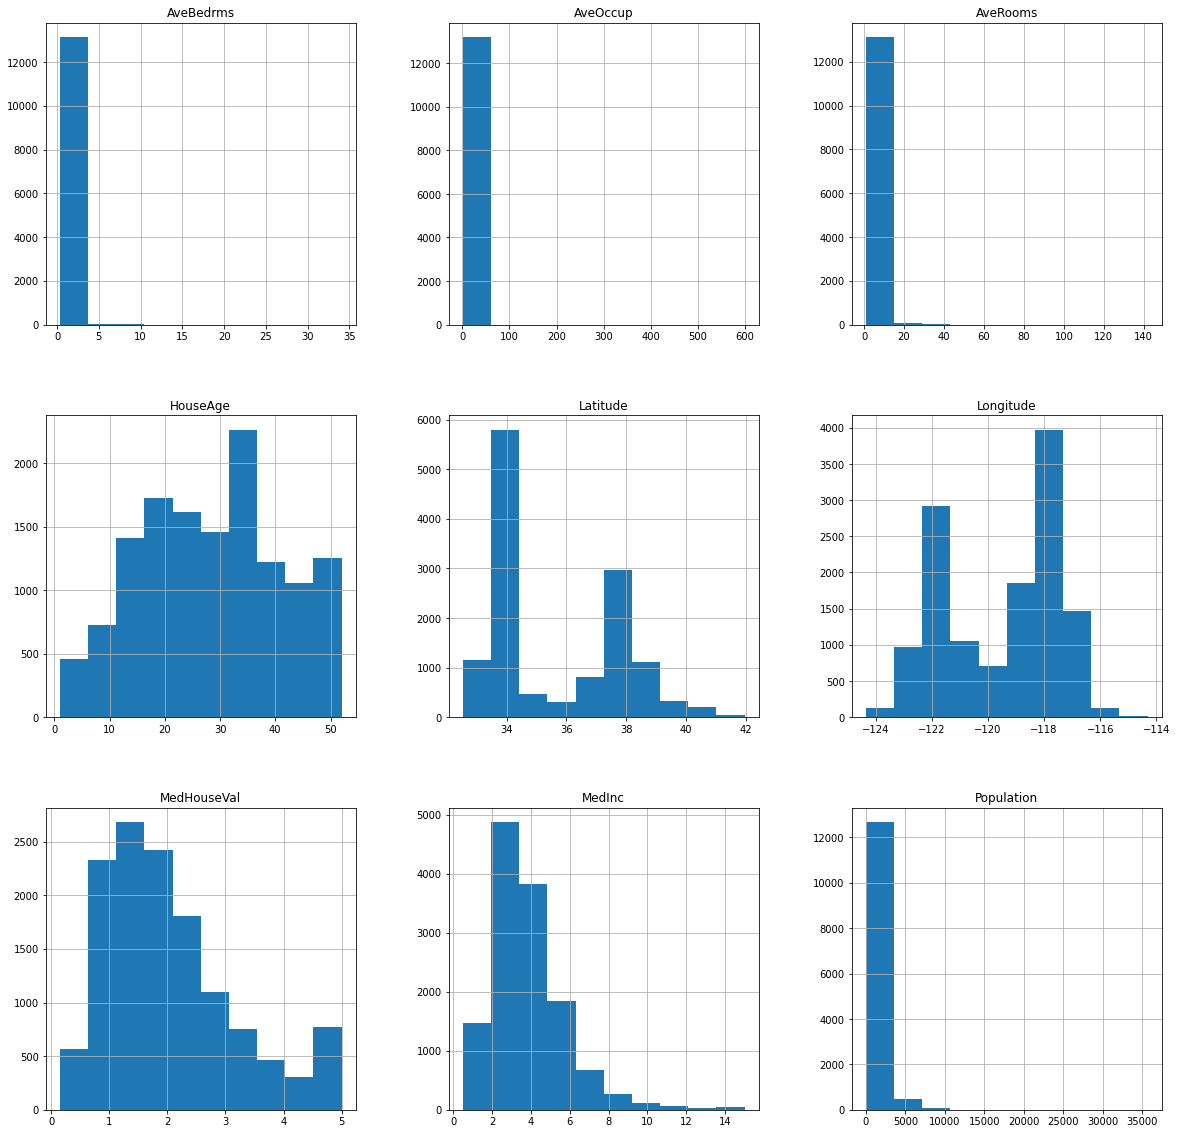

In [22]:
# 統計量表示
display(train_df.describe())
display(train_df.hist(figsize=(20,20)))

## CSVに書き出し
前処理してないバージョンのデータ

In [25]:
def df_write_csv(df, path, file_name, extension='.csv' ,index=False):
  '''pandas.DataframeをCSVに出力'''
  output_file = os.path.join(path, file_name+extension)
  df.to_csv(path_or_buf=output_file, index=index)

data_path = 'datasets/origin'
df_write_csv(train_df, data_path, 'train')
df_write_csv(val_df, data_path, 'val')
df_write_csv(test_df, data_path, 'test')
%ls {data_path}

test.csv  train.csv  val.csv


## データの前処理
- 標準化

In [37]:
%time
std_scaler = StandardScaler()
std_scaler.fit(train_df.values)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


StandardScaler()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
train shape:(13209, 9)
validation shape:(3303, 9)
test shape:(4128, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,1.320900e+04,1.320900e+04,1.320900e+04,1.320900e+04,1.320900e+04,1.320900e+04,1.320900e+04,1.320900e+04,1.320900e+04
mean,5.184445e-17,4.296661e-17,3.152062e-16,2.882152e-16,4.890898e-17,-2.970397e-18,-1.791469e-15,5.558797e-15,-1.479835e-16
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.758228e+00,-2.189483e+00,-1.707832e+00,-1.455788e+00,-1.220615e+00,-3.215627e-01,-1.444407e+00,-2.391143e+00,-1.658315e+00
25%,-6.829204e-01,-8.421618e-01,-3.783218e-01,-1.788923e-01,-5.489807e-01,-8.686180e-02,-7.882030e-01,-1.114026e+00,-7.538920e-01
50%,-1.797810e-01,2.963406e-02,-7.926176e-02,-9.825768e-02,-2.289114e-01,-3.253981e-02,-6.429007e-01,5.322578e-01,-2.379570e-01
75%,4.493144e-01,6.636674e-01,2.274882e-01,-2.241621e-03,2.562999e-01,3.325598e-02,9.788595e-01,7.767060e-01,4.901138e-01
max,5.870783e+00,1.852480e+00,5.085622e+01,6.251960e+01,2.915106e+01,8.316622e+01,2.966219e+00,2.617550e+00,2.575687e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48abe9a1d0>,
      dtype=object)

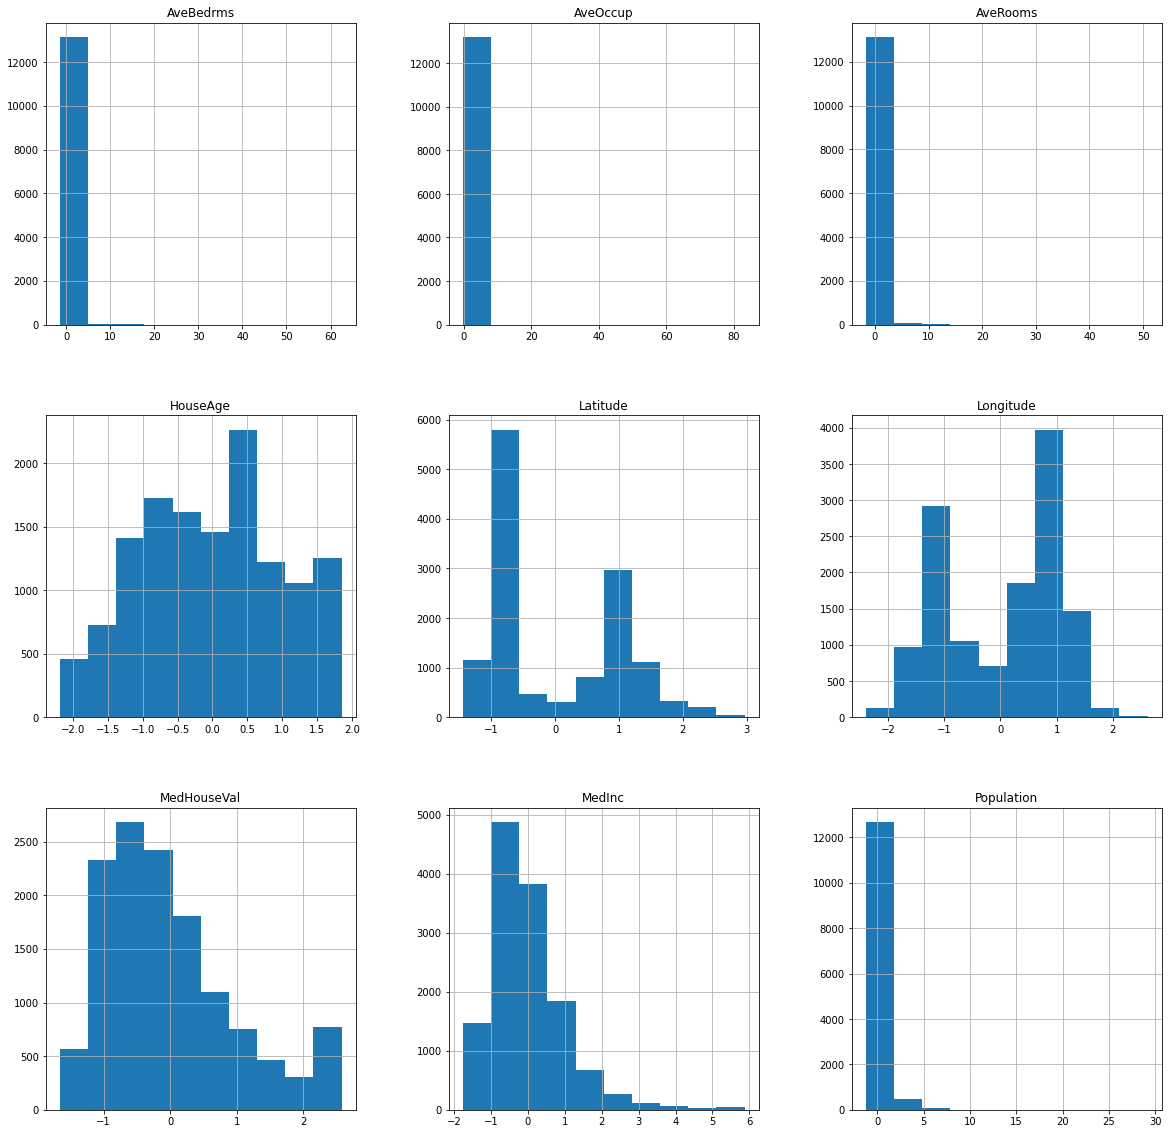

In [45]:
%time

def scaler_df(df, scaler):
  '''scalerで処理したpandas.Dataframeを返す'''
  trans_data = std_scaler.transform(df.values)
  trans_df = pd.DataFrame(data=trans_data, columns=df.columns)
  return trans_df

std_train_df = scaler_df(train_df, std_scaler)
std_val_df = scaler_df(val_df, std_scaler)
std_test_df = scaler_df(test_df, std_scaler)

# サイズの確認
print('train shape:{}'.format(std_train_df.shape))
print('validation shape:{}'.format(std_val_df.shape))
print('test shape:{}'.format(std_test_df.shape))

# 統計量表示
display(std_train_df.describe())
display(std_train_df.hist(figsize=(20,20)))

## 標準化器をcloudpikleで書き出し

In [49]:
%time

def write_pkl(obj, path, file_name, extension='.pkl'):
  '''オブジェクトを.pklに書き出し'''
  output_file = os.path.join(path, file_name+extension)
  with open(output_file, 'wb') as f:
    cloudpickle.dump(obj, f)

output_path = 'datasets/std'
write_pkl(std_scaler, output_path, 'std_scaler')
%ls {output_path}

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
std_scaler.pkl  std_test.csv  std_train.csv  std_val.csv


## 前処理済みデータをCSVに書き出し

In [50]:
data_path = 'datasets/std'
df_write_csv(std_train_df, data_path, 'std_train')
df_write_csv(std_val_df, data_path, 'std_val')
df_write_csv(std_test_df, data_path, 'std_test')
%ls {data_path}

std_scaler.pkl  std_test.csv  std_train.csv  std_val.csv
